In [16]:
#https://chrishavlin.com/2016/11/16/shapefiles-tutorial/
#https://github.com/chrishavlin/learning_shapefiles/blob/master/src/basic_read_plot.py

import shapefile
import numpy as np
import matplotlib.pyplot as plt

In [17]:
"""
 IMPORT THE SHAPEFILE
"""
#shp_file_base='cb_2018_us_state_20m'
#dat_dir='../data/'+shp_file_base +'/'
myshp=open("cb_2015_us_state_20m/cb_2015_us_state_20m.shp", "rb")
sf = shapefile.Reader(shp= myshp)

print( 'number of shapes imported:',len(sf.shapes()))
print(' ')
print( 'geometry attributes in each shape:')
for name in dir(sf.shape()):
    if not name.startswith('__'):
        print(name)

number of shapes imported: 52
 
geometry attributes in each shape:
_from_geojson
bbox
parts
points
shapeType
shapeTypeName


(-124.409591, -114.139055)

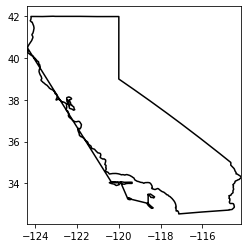

In [18]:
"""
       PLOTTING
"""


""" PLOTS A SINGLE SHAPE """
plt.figure()
ax = plt.axes()
ax.set_aspect('equal')
shape_ex = sf.shape(1)
x_lon = np.zeros((len(shape_ex.points),1))
y_lat = np.zeros((len(shape_ex.points),1))
for ip in range(len(shape_ex.points)):
    x_lon[ip] = shape_ex.points[ip][0]
    y_lat[ip] = shape_ex.points[ip][1]

plt.plot(x_lon,y_lat,'k')

# use bbox (bounding box) to set plot limits
plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])

(23, 50)

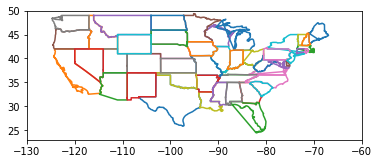

In [19]:
""" PLOTS ALL SHAPES """
plt.figure()
ax = plt.axes()
ax.set_aspect('equal')
for shape in list(sf.iterShapes()):
    x_lon = np.zeros((len(shape.points),1))
    y_lat = np.zeros((len(shape.points),1))
    for ip in range(len(shape.points)):
        x_lon[ip] = shape.points[ip][0]
        y_lat[ip] = shape.points[ip][1]

    plt.plot(x_lon,y_lat)
plt.xlim(-130,-60)
plt.ylim(23,50)

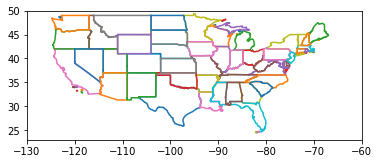

In [20]:
""" PLOTS ALL SHAPES """
plt.figure()
ax = plt.axes()
ax.set_aspect('equal')
for shape in list(sf.iterShapes()):
    x_lon = np.zeros((len(shape.points),1))
    y_lat = np.zeros((len(shape.points),1))
    for ip in range(len(shape.points)):
        x_lon[ip] = shape.points[ip][0]
        y_lat[ip] = shape.points[ip][1]

    plt.plot(x_lon,y_lat)
plt.xlim(-130,-60)
plt.ylim(23,50)


""" PLOTS ALL SHAPES AND PARTS """
plt.figure()
ax = plt.axes() # add the axes
ax.set_aspect('equal')

for shape in list(sf.iterShapes()):
    npoints=len(shape.points) # total points
    nparts = len(shape.parts) # total parts

    if nparts == 1:
        x_lon = np.zeros((len(shape.points),1))
        y_lat = np.zeros((len(shape.points),1))
        for ip in range(len(shape.points)):
            x_lon[ip] = shape.points[ip][0]
            y_lat[ip] = shape.points[ip][1]
        plt.plot(x_lon,y_lat)

    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
               i1 = shape.parts[ip+1]-1
            else:
               i1 = npoints

            seg=shape.points[i0:i1+1]
            x_lon = np.zeros((len(seg),1))
            y_lat = np.zeros((len(seg),1))
            for ip in range(len(seg)):
                x_lon[ip] = seg[ip][0]
                y_lat[ip] = seg[ip][1]

            plt.plot(x_lon,y_lat)

plt.xlim(-130,-60)
plt.ylim(23,50)
plt.show()

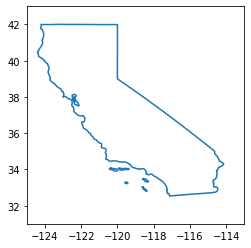

In [24]:
""" PLOTS ALL SHAPES AND PARTS """
plt.figure()
ax = plt.axes() # add the axes
ax.set_aspect('equal')

shapes = list(sf.iterShapes())

shape = shapes[1]
npoints=len(shape.points) # total points
nparts = len(shape.parts) # total parts

# loop over parts of each shape, plot separately
for ip in range(nparts): # loop over parts, plot separately
    i0=shape.parts[ip]
    if ip < nparts-1:
        i1 = shape.parts[ip+1]-1
    else:
        i1 = npoints

    seg=shape.points[i0:i1+1]
    x_lon = np.zeros((len(seg),1))
    y_lat = np.zeros((len(seg),1))
    for ip in range(len(seg)):
        x_lon[ip] = seg[ip][0]
        y_lat[ip] = seg[ip][1]

    plt.plot(x_lon,y_lat,'tab:blue')

plt.xlim(-125,-113)
plt.ylim(31,43)
plt.show()